# Demo of NF-HEDM reconstruction using HEXOMAP
> requires python version >= 3.7

In [1]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import sys
sys.path.insert(0, '..')
import numpy as np
import matplotlib.pyplot as plt
import pickle
# customized module

import reconstruction  # g-force caller
import MicFileTool     # io for reconstruction rst
import IntBin          # io for binary image (reduced data)

## Calibration with Au cube

integrate quaterdegree binary images into one degreee

> quater degree is harder to get geometry parameters


In [ ]:
# integrate binary
#
# this step can be skipped if the images are already interated into 1 degree omega step
output='/home/hedm/work/suter_aug18/johnson_aug18/Au_reduced_1degree/Au_int_1degree_suter_aug18_z0_'
ImagePar={'nDetectors':4,
        'sBinFilePrefix':'/home/hedm/work/suter_aug18/johnson_aug18/Au_reduced/Au_johnson_aug18_z0_',
        'nReductionNSUM':4,
        'nBinFileIndexStart':0,
        'fOmegaStart':-90,
        'fOmegaStop':90,
        }
IntBin.IntegrateBinFiles(ImagePar,output)

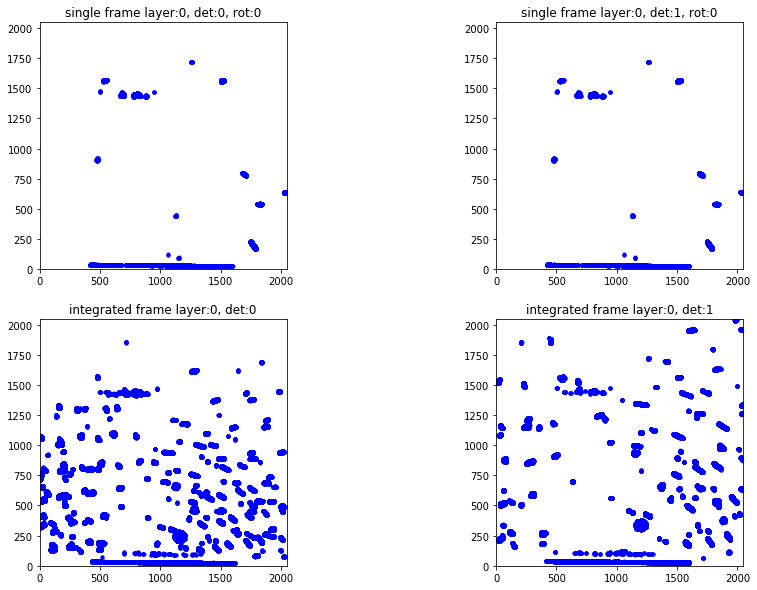

In [21]:
import IntBin
import matplotlib.pyplot as plt
import numpy as np
rawInitial = '../data/johnson_aug18_demo/Au_reduced_1degree/Au_int_1degree_suter_aug18_z'
NRot = 30   # only number of images to display, doen't have to be all images(no need set to 180 or 720.can be some thing like 10)
NDet = 2
idxLayer = 0
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
figure, ax = plt.subplots(2, NDet)
for idxDet in range(NDet):
    # single frame
    idxRot = 0  # index of rotation (0~719)
    b=IntBin.ReadI9BinaryFiles(f'{rawInitial}{idxLayer}_{0:06d}.bin{1}'.format(int(idxRot),idxDet))
    ax[0,idxDet].plot(2047-b[0],2047-b[1],'b.')
    ax[0,idxDet].axis('scaled')
    ax[0,idxDet].set_xlim((0,2048))
    ax[0,idxDet].set_ylim((0,2048))
    ax[0,idxDet].set_title(f'single frame layer:{idxLayer}, det:{idxDet}, rot:{idxRot}')
    
    # integrated frame:
    lX = []
    lY = []
    for idxRot in range(NRot):
        #print(b)
        b = IntBin.ReadI9BinaryFiles(f'{rawInitial}{idxLayer}_{idxRot:06d}.bin{idxDet}')
        lX.append(b[0])
        lY.append(b[1])
    aX = np.concatenate(lX)
    aY = np.concatenate(lY)
    ax[1,idxDet].plot(2047-aX,2047-aY,'b.')  
    ax[1,idxDet].axis('scaled')
    ax[1,idxDet].set_xlim((0,2048))
    ax[1,idxDet].set_ylim((0,2048))
    ax[1,idxDet].set_title(f'integrated frame layer:{idxLayer}, det:{idxDet}')

plt.show()

## blind search for geometry parameters

In [2]:
import sys
sys.path.insert(0, '/home/fyshen13/HEXOMAP/')
import config
import numpy as np

Au_Config={
    'micsize' : np.array([20, 20]),
    'micVoxelSize' : 0.001,
    'micShift' : np.array([0.0, 0.0, 0.0]),
    'expdataNDigit' : 6,
    'energy' : 65.351,      #55.587 # in kev
    'sample' : 'gold',
    'maxQ' : 9,
    'etalimit' : 81 / 180.0 * np.pi,
    'NRot' : 180,
    'NDet' : 2,
    'searchBatchSize' : 6000,
    'reverseRot' : True,          # for aero, is True, for rams: False
    'detL' : np.array([[ 4.5, 6.5]]),
    'detJ' : np.array([[1020.4672, 1035.6063]]),
    'detK' : np.array([[1995.8868, 1990.6409]]),
    'detRot' : np.array([[[90, 90, 0],
                  [90, 90, 0]]]),
    'fileBin' : '../data/johnson_aug18_demo/Au_reduced_1degree//Au_int_1degree_suter_aug18_z',
    'fileBinDigit' : 6,
    'fileBinDetIdx' : np.array([0, 1]),
    'fileBinLayerIdx' : 0,
    'fileFZ' : '/home/heliu/work/dev/HEXOMAP/data/FZ_files/CubicFZ.dat',
    '_initialString' : 'demo_gold_'}
    
c = config.Config(**Au_Config)
print(c)


Configurations:
NDet                           2
NRot                           180
_initialString                 demo_gold_
detJ                           [[1020.4672 1035.6063]]
detK                           [[1995.8868 1990.6409]]
detL                           [[4.5 6.5]]
detRot                         [[[90 90  0]
  [90 90  0]]]
energy                         65.351
etalimit                       1.413716694115407
expdataNDigit                  6
fileBin                        ../data/johnson_aug18_demo/Au_reduced_1degree//Au_int_1degree_suter_aug18_z
fileBinDetIdx                  [0 1]
fileBinDigit                   6
fileBinLayerIdx                0
fileFZ                         /home/heliu/work/dev/HEXOMAP/data/FZ_files/CubicFZ.dat
maxQ                           9
micShift                       [0. 0. 0.]
micVoxelSize                   0.001
micsize                        [20 20]
reverseRot                     True
sample                         gold
searchBatchSize       

In [2]:
import reconstruction
import numpy as np
try:
    S.clean_up()
except NameError:
    pass

S = reconstruction.Reconstructor_GPU()
print(c)
S.load_config(c)
c.detL, c.detJ, c.detK, c.detRot = S.geo_opt_phase_0(centerL=np.array(c.detL), rotOptimization=True)
print(c.detL, c.detJ, c.detK, c.detRot)
c.save('../data/johnson_aug18_demo/demo_gold_blind_search_0.h5')

(256, 3)

Configurations:
NDet                           2
NRot                           180
_Config__name                  name
_initialString                 demo_gold_
detJ                           [[1020.4672 1035.6063]]
detK                           [[1995.8868 1990.6409]]
detL                           [[4.5 6.5]]
detNJ                          [2048 2048 2048 2048]
detNK                          [2048 2048 2048 2048]
detPixelJ                      [0.00148 0.00148 0.00148 0.00148]
detPixelK                      [0.00148 0.00148 0.00148 0.00148]
detRot                         [[[90 90  0]
  [90 90  0]]]
energy                         65.351
etalimit                       1.413716694115407
expdataNDigit                  6
fileBin                        ../data/johnson_aug18_demo/Au_reduced_1degree//Au_int_1degree_suter_aug18_z
fileBinDetIdx                  [0 1]
fileBinDigit                   6
fileBinLayerIdx                0
fileFZ                         /home/heliu/work/de

In [2]:
# load blind search zero and recon
import sys
sys.path.insert(0, '/home/heliu/work/dev/HEXOMAP/')
import config
import numpy as np
import reconstruction
import MicFileTool
c = config.Config.load('../data/johnson_aug18_demo/demo_gold_blind_search_0.h5')
c.micsize = np.array([20, 20])
c.micVoxelSize = 0.005
c.micShift = np.array([0.0, 0.0, 0.0])
print(c)

try:
    S.clean_up()
except NameError:
    pass

S = reconstruction.Reconstructor_GPU()
S.load_config(c)
S.serial_recon_multi_stage()

MicFileTool.plot_mic_and_conf(S.squareMicData, 0.4)

/opt/anaconda/anaconda3/envs/mpi_pycuda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)



Configurations:
NDet                           2
NRot                           180
_Config__name                  name
_initialString                 demo_gold_
detJ                           [[1014.36277089 1024.77096087]]
detK                           [[2015.93929242 2012.2567582 ]]
detL                           [[4.52326051 6.52326051]]
detNJ                          [2048 2048 2048 2048]
detNK                          [2048 2048 2048 2048]
detPixelJ                      [0.00148 0.00148 0.00148 0.00148]
detPixelK                      [0.00148 0.00148 0.00148 0.00148]
detRot                         [[[ 9.00013583e+01  9.00022120e+01 -6.88255965e-04]
  [ 9.00004325e+01  8.99987178e+01  1.84117090e-03]]]
energy                         65.351
etalimit                       1.413716694115407
expdataNDigit                  6
fileBin                        ../data/johnson_aug18_demo/Au_reduced_1degree//Au_int_1degree_suter_aug18_z
fileBinDetIdx                  [0 1]
fileBinDigit     

<Figure size 640x480 with 3 Axes>

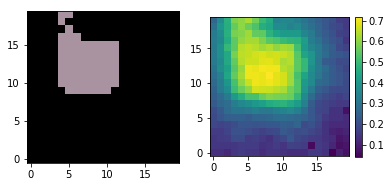

In [8]:
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.6)

Niter: 01, vIdx: 0000171, prog: 0000000/0000400, conf: 0.680556, pkcnt: 72, euler: [ 40.4746  38.7571 349.4273][0.05   0.0074 0.0074 0.003  0.003 ]
[0.05 5.   5.   2.   2.  ]
Niter: 01, vIdx: 0000171, prog: 0000000/0000400, conf: 0.746479, pkcnt: 71, euler: [ 40.4041  38.7862 349.512 ][0.045  0.0081 0.0074 0.003  0.003 ]
 loss: 0.2571858096122742, sumdp: 0.06646000000000002, centerL: [[4.5233 6.5233]], centerJ: [[1009.3628 1024.771 ]],centerK: [[2015.9393 2012.2568]].
Niter: 01, vIdx: 0000171, prog: 0000000/0000400, conf: 0.774648, pkcnt: 71, euler: [ 40.4046  38.7685 349.5059][0.045  0.0081 0.0067 0.0027 0.0033]
 loss: 0.2166438519954681, sumdp: 0.06572, centerL: [[4.5233 6.5233]], centerJ: [[1009.3628 1024.771 ]],centerK: [[2015.9393 2014.2568]].
Niter: 01, vIdx: 0000171, prog: 0000000/0000400, conf: 0.760563, pkcnt: 71, euler: [ 40.3662  38.512  349.3859][0.0405 0.009  0.0067 0.0027 0.0033]
 loss: 0.21603029847145083, sumdp: 0.06203400000000001, centerL: [[4.5233 6.5233]], centerJ: 

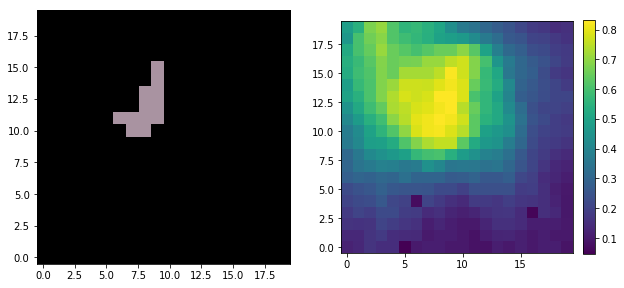

In [9]:
# first iteration of twiddle:
# this cell can be repeated until find good parameters, i.e. sample region confidence>0.9
# make mask:
import time
squareMic = S.squareMicData
#squareMic = np.load('Au_suter_aug17_10x10_0.002_shift_0_0_0.npy')
maskFinal = np.zeros(c.micsize)
maskFinal[squareMic[:,:,6]>0.6] = 1
x,y = np.where(maskFinal==1)
aIdxVoxel = x * maskFinal.shape[0] + y

aIdxVoxel = np.random.choice(aIdxVoxel,100)
start = time.time()
c.detL, c.detJ, c.detK, c.detRot = S.twiddle_refine_backup(aIdxVoxel,c.detL, c.detJ, c.detK, c.detRot)
end = time.time()
print(f'twiddle takes: {end- start} seconds')
print(c.detL, c.detJ, c.detK, c.detRot)
c.save('../data/johnson_aug18_demo/demo_gold_twiddle_0.h5')

S.load_config(c)
S.serial_recon_multi_stage()

import MicFileTool
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import numpy as np
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.8)

Niter: 01, vIdx: 0000133, prog: 0000000/0000400, conf: 0.774648, pkcnt: 71, euler: [ 40.5065  38.609  349.2198][0.05   0.0074 0.0074 0.003  0.003 ]
[0.05 5.   5.   2.   2.  ]
Niter: 01, vIdx: 0000133, prog: 0000000/0000400, conf: 0.614286, pkcnt: 70, euler: [ 40.3863  38.6694 349.3873][0.0365 0.0054 0.0054 0.0026 0.0024]
 loss: 0.23362107515335084, sumdp: 0.05227416000000001, centerL: [[4.5225 6.5225]], centerJ: [[1005.9563 1026.1433]],centerK: [[2015.2759 2013.9379]].
Niter: 01, vIdx: 0000133, prog: 0000000/0000400, conf: 0.774648, pkcnt: 71, euler: [ 40.5065  38.609  349.2198][0.0266 0.0039 0.0039 0.0023 0.0017]
 loss: 0.23128900170326228, sumdp: 0.03853511496000001, centerL: [[4.5225 6.5225]], centerJ: [[1005.9563 1026.1433]],centerK: [[2016.7193 2013.9379]].
Niter: 01, vIdx: 0000133, prog: 0000000/0000400, conf: 0.774648, pkcnt: 71, euler: [ 40.6832  38.3364 349.2646][0.0239 0.0043 0.0039 0.0023 0.0016]
 loss: 0.224268091917038, sumdp: 0.03609639126000001, centerL: [[4.5225 6.5225]

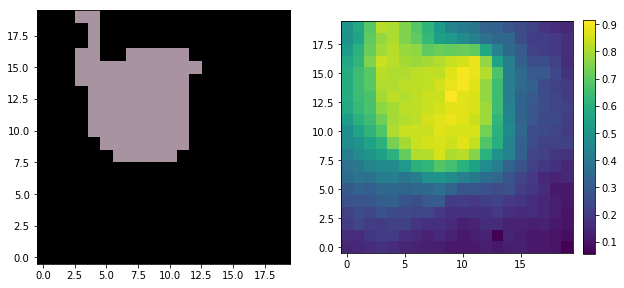

In [10]:
# second iteration of twiddle:
# this cell can be repeated until find good parameters, i.e. sample region confidence>0.9
# make mask:
import time
squareMic = S.squareMicData
#squareMic = np.load('Au_suter_aug17_10x10_0.002_shift_0_0_0.npy')
maskFinal = np.zeros(c.micsize)
maskFinal[squareMic[:,:,6]>0.7] = 1
x,y = np.where(maskFinal==1)
aIdxVoxel = x * maskFinal.shape[0] + y

aIdxVoxel = np.random.choice(aIdxVoxel,100)
start = time.time()
c.detL, c.detJ, c.detK, c.detRot = S.twiddle_refine_backup(aIdxVoxel,c.detL, c.detJ, c.detK, c.detRot)
end = time.time()
print(f'twiddle takes: {end- start} seconds')
print(c.detL, c.detJ, c.detK, c.detRot)
c.save('../data/johnson_aug18_demo/demo_gold_twiddle_1.h5')

S.load_config(c)
S.serial_recon_multi_stage()

import MicFileTool
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import numpy as np
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.8)

Niter: 01, vIdx: 0000092, prog: 0000000/0000400, conf: 0.557143, pkcnt: 70, euler: [ 40.8718  38.1943 348.9811][0.05   0.0074 0.0074 0.003  0.003 ]
[0.05 5.   5.   2.   2.  ]
Niter: 01, vIdx: 0000092, prog: 0000000/0000400, conf: 0.742857, pkcnt: 70, euler: [ 40.6365  38.2615 349.0584][0.0092 0.0012 0.0012 0.0005 0.0005]
 loss: 0.16376881122589115, sumdp: 0.012627961982987533, centerL: [[4.5356 6.5356]], centerJ: [[1008.6135 1027.2765]],centerK: [[2016.7193 2014.7128]].
Niter: 01, vIdx: 0000092, prog: 0000000/0000400, conf: 0.771429, pkcnt: 70, euler: [ 40.9725  38.2748 348.8565][0.0092 0.0011 0.0014 0.0005 0.0005]
 loss: 0.16152146756649022, sumdp: 0.012627961982987535, centerL: [[4.5356 6.5356]], centerJ: [[1008.6135 1026.4427]],centerK: [[2016.7193 2014.7128]].
Niter: 01, vIdx: 0000092, prog: 0000000/0000400, conf: 0.623188, pkcnt: 69, euler: [ 40.8455  38.0907 348.901 ][0.0092 0.0011 0.0014 0.0006 0.0005]
 loss: 0.16017056763172155, sumdp: 0.012684317404677405, centerL: [[4.5356 6.

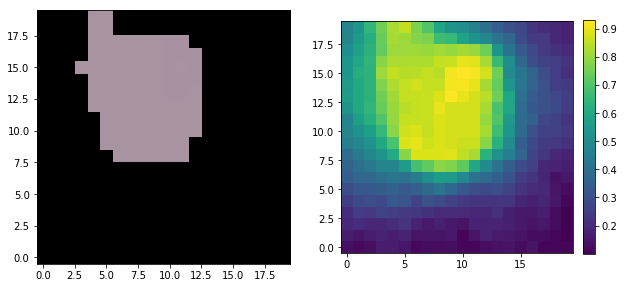

In [11]:
# third iteration of twiddle:
# this cell can be repeated until find good parameters, i.e. sample region confidence>0.9
# make mask:
import time
squareMic = S.squareMicData
#squareMic = np.load('Au_suter_aug17_10x10_0.002_shift_0_0_0.npy')
maskFinal = np.zeros(c.micsize)
maskFinal[squareMic[:,:,6]>0.8] = 1
x,y = np.where(maskFinal==1)
aIdxVoxel = x * maskFinal.shape[0] + y

aIdxVoxel = np.random.choice(aIdxVoxel,100)
start = time.time()
c.detL, c.detJ, c.detK, c.detRot = S.twiddle_refine_backup(aIdxVoxel,c.detL, c.detJ, c.detK, c.detRot)
end = time.time()
print(f'twiddle takes: {end- start} seconds')
print(c.detL, c.detJ, c.detK, c.detRot)
c.save('../data/johnson_aug18_demo/demo_gold_twiddle_2.h5')

S.load_config(c)
S.serial_recon_multi_stage()

import MicFileTool
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import numpy as np
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.8)

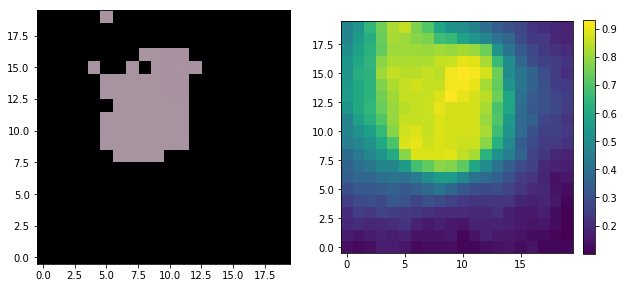

In [13]:
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.85)

Niter: 01, vIdx: 0000229, prog: 0000000/0000400, conf: 0.849315, pkcnt: 73, euler: [ 40.522   38.302  349.1444][0.05   0.0074 0.0074 0.003  0.003 ]
[0.05 5.   5.   2.   2.  ]
Niter: 01, vIdx: 0000229, prog: 0000000/0000400, conf: 0.849315, pkcnt: 73, euler: [ 40.6488  38.5341 349.0132][0.0215 0.0032 0.0032 0.0013 0.0016]
 loss: 0.13592390358448025, sumdp: 0.030725792856000012, centerL: [[4.5356 6.5356]], centerJ: [[1008.2184 1026.4427]],centerK: [[2016.3815 2013.7562]].
Niter: 01, vIdx: 0000229, prog: 0000000/0000400, conf: 0.835616, pkcnt: 73, euler: [ 40.6488  38.5341 349.0132][0.0174 0.0026 0.0032 0.0011 0.0014]
 loss: 0.13515860140323643, sumdp: 0.02571611112540001, centerL: [[4.5356 6.5356]], centerJ: [[1008.2184 1028.3798]],centerK: [[2016.3815 2013.7562]].
Niter: 01, vIdx: 0000229, prog: 0000000/0000400, conf: 0.863014, pkcnt: 73, euler: [ 40.6488  38.5341 349.0132][0.0015 0.0005 0.0005 0.0005 0.0005]
 loss: 0.1338682872056961, sumdp: 0.0035297061419403163, centerL: [[4.5342 6.5

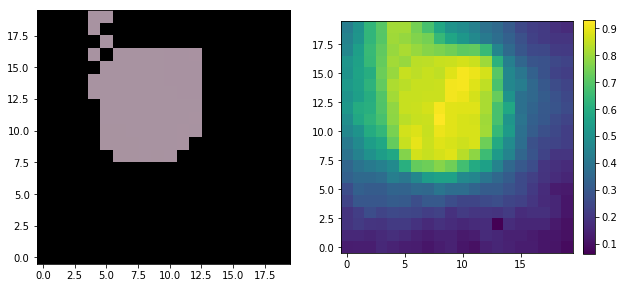

In [14]:
# fouth iteration of twiddle:
# this cell can be repeated until find good parameters, i.e. sample region confidence>0.9
# make mask:
import time
squareMic = S.squareMicData
#squareMic = np.load('Au_suter_aug17_10x10_0.002_shift_0_0_0.npy')
maskFinal = np.zeros(c.micsize)
maskFinal[squareMic[:,:,6]>0.85] = 1
x,y = np.where(maskFinal==1)
aIdxVoxel = x * maskFinal.shape[0] + y

aIdxVoxel = np.random.choice(aIdxVoxel,100)
start = time.time()
c.detL, c.detJ, c.detK, c.detRot = S.twiddle_refine_backup(aIdxVoxel,c.detL, c.detJ, c.detK, c.detRot)
end = time.time()
print(f'twiddle takes: {end- start} seconds')
print(c.detL, c.detJ, c.detK, c.detRot)
c.save('../data/johnson_aug18_demo/demo_gold_twiddle_3.h5')

S.load_config(c)
S.serial_recon_multi_stage()

import MicFileTool
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import numpy as np
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.8)

# reconstruct iron dataset

In [18]:
# step 1: reduce binray data set for fast initial guess

# fnbase = '/home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_z0_'

# output = fnbase

# ImagePar={'nDetectors':2,
#         'sBinFilePrefix':'/home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_',
#         'nReductionNSUM':4,
#         'nBinFileIndexStart':0,
#         'fOmegaStart':-90,
#         'fOmegaStop':90,
#         }
# IntBin.IntegrateBinFiles(ImagePar,output)

Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_000000.bin0
Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_000001.bin0
Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_000002.bin0
Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_000003.bin0
Writing: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_z0_000000.bin0
Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_000004.bin0
Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_000005.bin0
Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1/SB1_postheat_restart_V1__z0_000006.bin0
Reading: /home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_

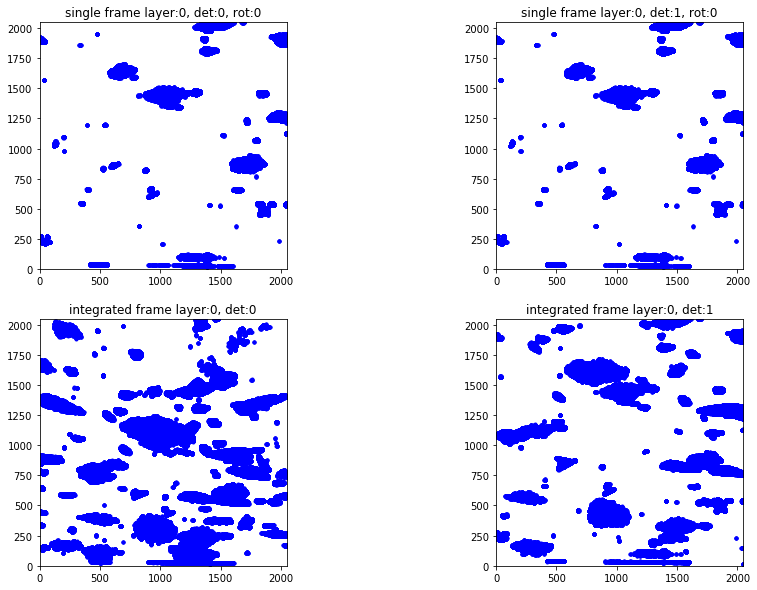

In [18]:
import IntBin
import matplotlib.pyplot as plt
import numpy as np
rawInitial = '../data/johnson_aug18_demo/SB1_postheat_restart_V1_1degree/SB1_V1_1degree_z'
NRot = 3   # only number of images to display, doen't have to be all images(no need set to 180 or 720.can be some thing like 10)
NDet = 2
idxLayer = 0
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
figure, ax = plt.subplots(2, NDet)
for idxDet in range(NDet):
    # single frame
    idxRot = 0  # index of rotation (0~719)
    b=IntBin.ReadI9BinaryFiles(f'{rawInitial}{idxLayer}_{0:06d}.bin{1}'.format(int(idxRot),idxDet))
    ax[0,idxDet].plot(2047-b[0],2047-b[1],'b.')
    ax[0,idxDet].axis('scaled')
    ax[0,idxDet].set_xlim((0,2048))
    ax[0,idxDet].set_ylim((0,2048))
    ax[0,idxDet].set_title(f'single frame layer:{idxLayer}, det:{idxDet}, rot:{idxRot}')
    
    # integrated frame:
    lX = []
    lY = []
    for idxRot in range(NRot):
        #print(b)
        b = IntBin.ReadI9BinaryFiles(f'{rawInitial}{idxLayer}_{idxRot:06d}.bin{idxDet}')
        lX.append(b[0])
        lY.append(b[1])
    aX = np.concatenate(lX)
    aY = np.concatenate(lY)
    ax[1,idxDet].plot(2047-aX,2047-aY,'b.')  
    ax[1,idxDet].axis('scaled')
    ax[1,idxDet].set_xlim((0,2048))
    ax[1,idxDet].set_ylim((0,2048))
    ax[1,idxDet].set_title(f'integrated frame layer:{idxLayer}, det:{idxDet}')

plt.show()

In [1]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [ ]:
'''
    Reconstruct sample SB with parameters from gold sample
'''

import sys
sys.path.insert(0, '/home/heliu/work/dev/HEXOMAP/')
import config
import numpy as np

c_Au = config.Config.load('../data/johnson_aug18_demo/demo_gold_twiddle_3.h5')
Fe_Config={
    'micsize' : np.array([150, 150]),
    'micVoxelSize' : 0.01,
    'micShift' : np.array([0.0, 0.0, 0.0]),
    'expdataNDigit' : 6,
    'energy' : 65.351,      #55.587 # in kev
    'sample' : 'iron_bcc',
    'maxQ' : 9,
    'etalimit' : 81 / 180.0 * np.pi,
    'NRot' : 180,
    'NDet' : 2,
    'searchBatchSize' : 6000,
    'reverseRot' : True,          # for aero, is True, for rams: False
    'detL' : c_Au.detL,
    'detJ' : c_Au.detJ,
    'detK' : c_Au.detK,
    'detRot' : c_Au.detRot,
    'fileBin' : '../data/johnson_aug18_demo/SB1_postheat_restart_V1_1degree/SB1_V1_1degree_z',
    'fileBinDigit' : 6,
    'fileBinDetIdx' : np.array([0, 1]),
    'fileBinLayerIdx' : 0,
    'fileFZ' : '../data/FZ_files/CubicFZ.dat',
    '_initialString' : '../data/johnson_aug18_demo/SB1_postheat_restart_V1_1degree'}
  
c = config.Config(**Fe_Config)
print(c)
c.save('../data/johnson_aug18_demo/SB1_postheat_restart_V1_1degree_config.h5')

In [ ]:
# load blind search zero and recon
import sys
sys.path.insert(0, '/home/heliu/work/dev/HEXOMAP/')
import config
import numpy as np
import reconstruction
import MicFileTool

print(c)

try:
    S.clean_up()
except NameError:
    pass

S = reconstruction.Reconstructor_GPU()
S.load_config(c)
S.serial_recon_multi_stage()

MicFileTool.plot_mic_and_conf(S.squareMicData, 0.5)


Configurations:
NDet                           2
NRot                           180
_Config__name                  name
_initialString                 ../data/johnson_aug18_demo/SB1_postheat_restart_V1_1degree
detJ                           [[1008.21839893 1028.37978854]]
detK                           [[2016.38146838 2013.75617509]]
detL                           [[4.5341869 6.5341869]]
detNJ                          [2048 2048 2048 2048]
detNK                          [2048 2048 2048 2048]
detPixelJ                      [0.00148 0.00148 0.00148 0.00148]
detPixelK                      [0.00148 0.00148 0.00148 0.00148]
detRot                         [[[89.43076176 89.33959661 -0.44538621]
  [89.57831563 89.05474807 -0.52657864]]]
energy                         65.351
etalimit                       1.413716694115407
expdataNDigit                  6
fileBin                        ../data/johnson_aug18_demo/SB1_postheat_restart_V1_1degree/SB1_V1_1degree_z
fileBinDetIdx                  [

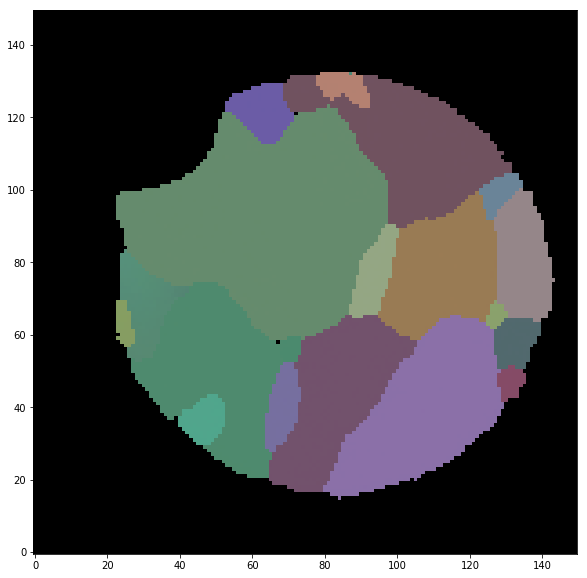

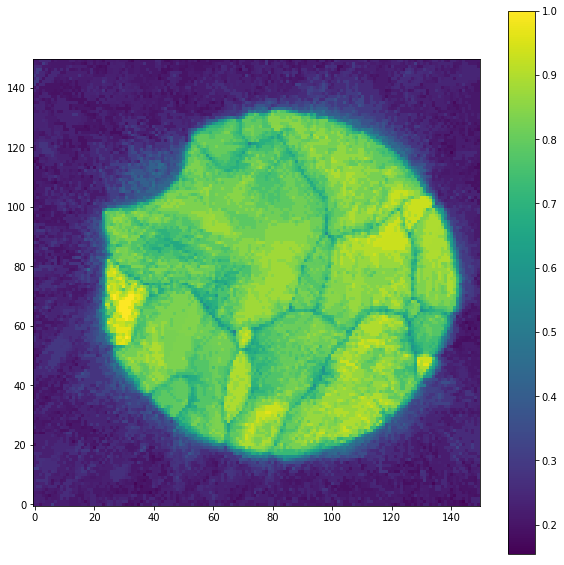

In [3]:
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.5)

## demonstrate using a mask

(256, 3)
7
 exp data loaded, shape is: (40248317, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 121, voxelLeft: 1/225.  max hitratio: 0.4137931168079376, peakcnt: 29,reconstructed euler angle [324.35284368  16.1629624   71.30069861]]]]number of flood fills: 25
1.5806679
 voxelIdx: 224, voxelLeft: 0/225.  max hitratio: 0.26923078298568726, peakcnt: 26,reconstructed euler angle [14.05659716 32.60436572 23.48389848]87]max misorien: 1.4339253902435303
1.4339254
 voxelIdx: 213, voxelLeft: 0/225.  max hitratio: 0.26923078298568726, peakcnt: 26,reconstructed euler angle [ 92.59363018  26.28201467 302.680378  ]max misorien: 0.07632486522197723
0.076324865
 voxelIdx: 42, voxelLeft: 0/225.  max hitratio: 0.20000000298023224, peakcnt: 25,reconstructed euler 

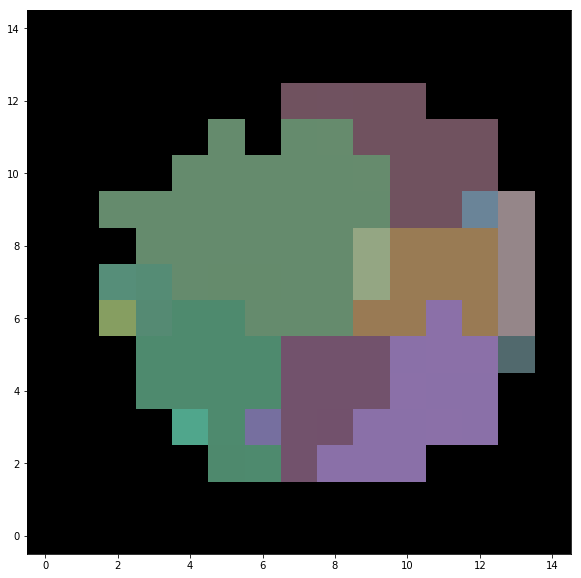

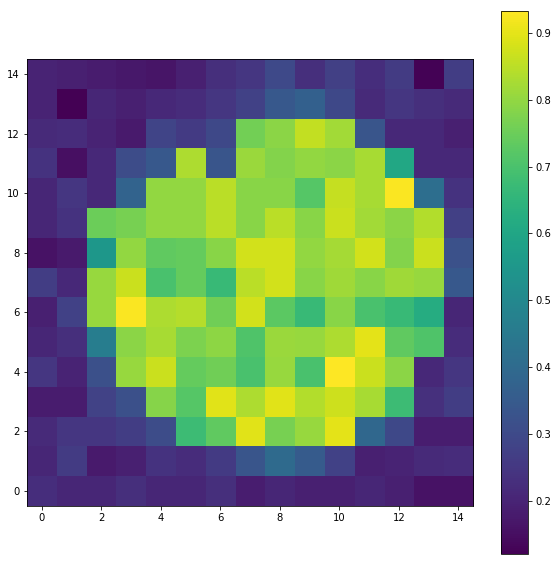

(256, 3)
7
 exp data loaded, shape is: (40248317, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 3100, voxelLeft: 1/13320.  max hitratio: 0.19230769574642181, peakcnt: 26,reconstructed euler angle [0.         0.         0.07004936]62893]]]]]e+02]number of flood fills: 224
2.0943952
 voxelIdx: 22441, voxelLeft: 0/13320.  max hitratio: 0.25, peakcnt: 28,reconstructed euler angle [ 69.57685347  33.90584575 260.46369001] 354.51700755]]max misorien: 1.608170509338379
1.6081705
 voxelIdx: 22441, voxelLeft: 0/13320.  max hitratio: 0.25, peakcnt: 28,reconstructed euler angle [ 69.52172829  33.9365271  260.41495007] 354.47102638]]max misorien: 1.508443832397461
1.5084438
 voxelIdx: 22141, voxelLeft: 0/13320.  max hitratio: 0.24137930572032928, peakcnt: 29,r

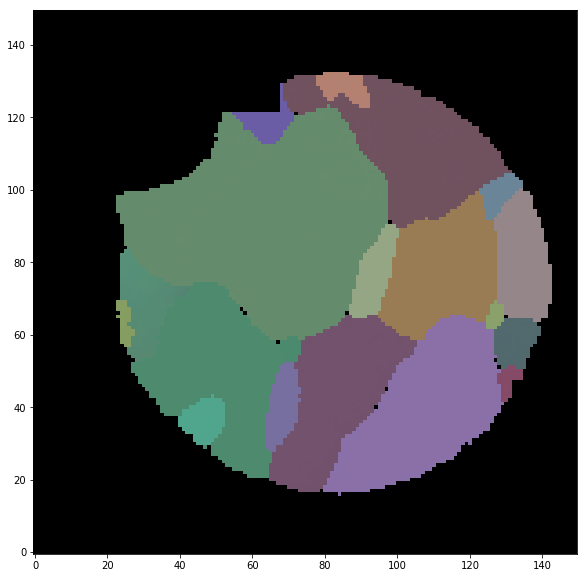

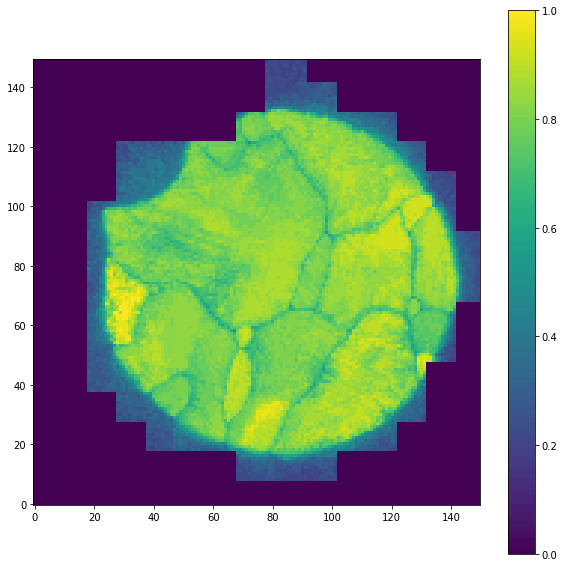

In [9]:
# # step 2: start reconstruction with calibrated configuration (parameters)
# import reconstruction
# import MicFileTool
# import numpy as np
# import matplotlib.pyplot as plt
# import IntBin
# import pickle
# import scipy.ndimage as ndi
# # check result of parameter get from blind search:
# # NOET: in practice, might need more iterations for better configuration params
# with open('geometry_au_johnson_aug18_twiddle_1.p', 'rb') as input:
#     centerL, centerJ, centerK, centerRot  = pickle.load(input)

# ############ low resolution reconstruction
# S = reconstruction.Reconstructor_GPU()
# S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
# S.set_Q(7)
# print(S.maxQ)

# S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
# S.set_sample('iron_bcc')
# S.energy = 65.351
# S.expDataInitial = '/home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1_1degree/SB1_V1_1degree_z0_' # reduced binary data
# S.expdataNDigit = 6                                                       # number of digit in the binary file name
# imgsize = [15, 15]
# voxelSize = 0.1
# shift = [0.0, 0.0, 0.0]
# S.create_square_mic(imgsize,
#                     voxelsize=voxelSize,
#                     shift=shift,
#                    )# resolution of reconstruction and voxel size
# S.squareMicOutFile = 'demoSB1_V1_Z0_johnson_aug17_' \
#                     + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
#                     + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
# S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
# S.intensity_threshold = 2 # throw away peaks with intensity below this value
# S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# S.serial_recon_multi_stage()

# #388seconds with verbose
# plt.rcParams["figure.figsize"] = (10,10)
# MicFileTool.plot_square_mic(S.squareMicData,0.6)
# MicFileTool.plot_conf_square_mic(S.squareMicData)

# ######### create mask
# mask_15_15 = np.load(S.squareMicOutFile)[:,:,6]>0.3
# #mask_30_30 = S.squareMicData[:,:,6]>0.5
# mask_150_15 = np.repeat(mask_15_15, 10, axis=0)
# mask_150_150 = np.repeat(mask_150_15, 10, axis=1)
# mask_150_150 = ndi.maximum_filter(mask_150_150,size=5)
# plt.imshow(mask_150_150.T, origin='lower')

# ######## high resolution reconstruction
# S = reconstruction.Reconstructor_GPU()
# S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
# S.set_Q(7)
# print(S.maxQ)

# S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
# S.set_sample('iron_bcc')
# S.energy = 65.351
# S.expDataInitial = '/home/hedm/work/suter_aug18/SB1_v1_v2_boxbeam/SB1_postheat_restart_V1_1degree/SB1_V1_1degree_z0_' # reduced binary data
# S.expdataNDigit = 6 
# imgsize = [150, 150]
# voxelSize = 0.01
# shift = [0.0, 0.0, 0.0]
# S.create_square_mic(imgsize,
#                     voxelsize=voxelSize,
#                     shift=shift,
#                     mask=mask_150_150,
#                    )# resolution of reconstruction and voxel size
# S.squareMicOutFile = 'demoSB1_V1_Z0_johnson_aug17_' \
#                     + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
#                     + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
# S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
# S.intensity_threshold = 2 # throw away peaks with intensity below this value
# S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# S.serial_recon_multi_stage()

# #388seconds with verbose
# plt.rcParams["figure.figsize"] = (10,10)
# MicFileTool.plot_square_mic(S.squareMicData,0.6)
# MicFileTool.plot_conf_square_mic(S.squareMicData)

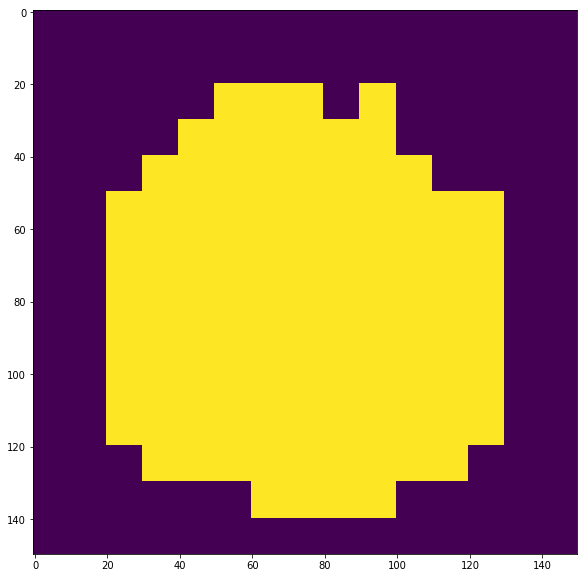

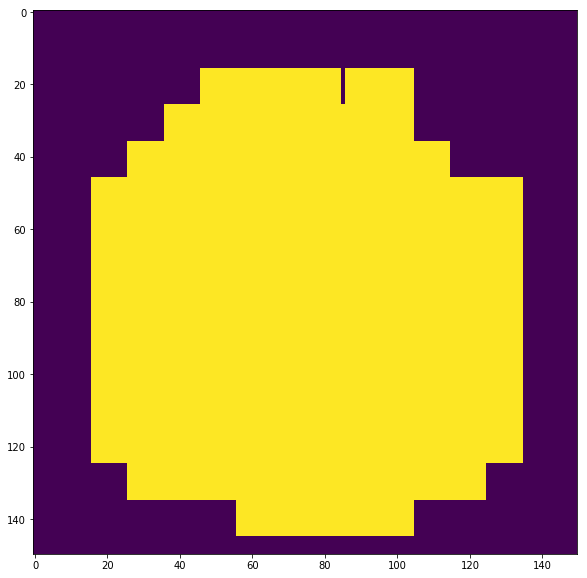

In [8]:
# import scipy.ndimage as ndi
# plt.imshow(mask_150_150)
# plt.show()
# mask_150_150_ = ndi.maximum_filter(mask_150_150,size=10)
# plt.imshow(mask_150_150_)
# plt.show()